In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import itertools
from collections import defaultdict


# Set Problem

In [2]:
import mlrose_hiive
# scikit 0.21.0
import mlrose

In [3]:
seeds = [1,2,5,8]

## 1. Traveling Salesman

In [4]:
def get_distances(coords, truncate=True):
    distances = [(c1, c2, np.linalg.norm(np.subtract(coords[c1], coords[c2])))
                 for c1, c2 in it.product(range(len(coords)), range(len(coords)))
                 if c1 != c2 and c2 > c1]
    if truncate:
        distances = [(c1, c2, int(d)) for c1, c2, d in distances]
    return distances

def list_duplicates_(seq):
        tally = defaultdict(list)
        for i, item in enumerate(seq):
            tally[item].append(i)
        return list((indices[1:] for _, indices in tally.items() if len(indices) > 1))


In [5]:
from timeit import default_timer as timer


In [6]:
import itertools as it

from mlrose_hiive import TSPOpt
import networkx as nx

area_width = 250
area_height = 250
number_of_cities = 20

x_coords = np.random.randint(area_width, size=number_of_cities)
y_coords = np.random.randint(area_height, size=number_of_cities)

coords = list(tuple(zip(x_coords, y_coords)))
duplicates = list_duplicates_(coords)

while len(duplicates) > 0:
    for d in duplicates:
        x_coords = np.random.randint(area_width, size=len(d))
        y_coords = np.random.randint(area_height, size=len(d))
        for i in range(len(d)):
            coords[d[i]] = (x_coords[i], y_coords[i])
            pass
    duplicates = list_duplicates_(coords)
distances = get_distances(coords, False)

g = nx.Graph()
for a, b, distance in distances:

    g.add_edge(a, b, length=int(round(distance)))

tsp_problem = TSPOpt(coords=coords, distances=distances, maximize=True, source_graph=g)

### 1.1 Solve Traveling Salesman with Random Hill Climb

In [7]:
max_attempts = 100
max_iters = 100

In [8]:
t_rhc_best_fitness = 0
rhc_restart_list = [10, 20, 50, 80, 100]
best_restart_num = 0

list_t_rhc_fitness_curve = []

for seed in seeds:
    time_rhc_sales = []

    for restart_num in rhc_restart_list:
        start = timer()
        state, fitness, fitness_curve = mlrose_hiive.random_hill_climb(tsp_problem, 
                                                                    max_attempts = max_attempts, 
                                                                     max_iters=max_iters, 
                                                                     curve=True, 
                                                                     random_state=seed,
                                                                    restarts=restart_num)
        stop = timer()
        time_rhc_sales.append(stop - start)
        if fitness > t_rhc_best_fitness:
            t_rhc_best_fitness = fitness
            t_rhc_best_state = state
            t_rhc_fitness_curve = fitness_curve
            best_restart_num = restart_num
    list_t_rhc_fitness_curve.append(t_rhc_fitness_curve)
# print(list_t_rhc_fitness_curve)
# print(t_rhc_fitness_curve)
      
t_rhc_time = np.mean(time_rhc_sales)
print(best_restart_num)


80


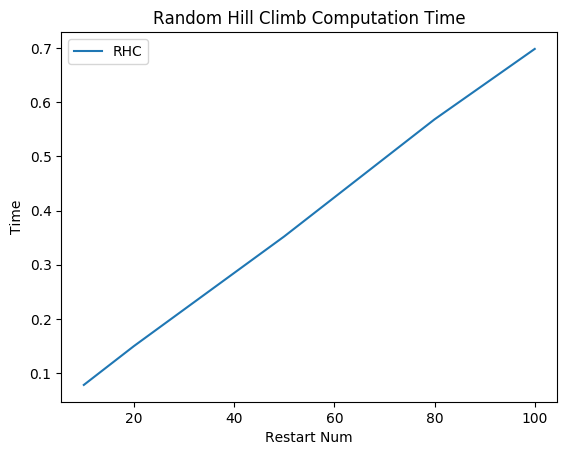

In [9]:
fig, ax = plt.subplots()
# set labels and title
ax.set_xlabel("Restart Num")
ax.set_ylabel("Time")

# N Queens
ax.set_title("Random Hill Climb Computation Time")

ax.plot(rhc_restart_list, time_rhc_sales, label='RHC')

ax.legend()
# show plot
plt.show()

### 1.2 Solve Traveling Salesman with Simulated Annealing

In [10]:
t_sa_best_fitness = 0
sa_temp_list = [0.1, 0.5, 0.75, 1.0, 2.0, 5.0]
best_temp = -1
list_t_sa_fitness_curve = []

for seed in seeds:
    time_sa_sales = []

    for temp in sa_temp_list:
        start = timer()
        state, fitness, fitness_curve = mlrose_hiive.simulated_annealing(
                                                        tsp_problem, 
                                                        max_attempts=max_attempts, 
                                                        max_iters=max_iters, 
                                                        curve=True, 
                                                        random_state=seed,
                                                        schedule=mlrose_hiive.GeomDecay(init_temp = temp, decay=0.1, min_temp=temp))
        stop = timer()
        time_sa_sales.append(stop - start)
        if fitness > t_sa_best_fitness:
            t_sa_best_fitness = fitness
            t_sa_best_state = state
            t_sa_fitness_curve = fitness_curve
            best_temp = temp
    list_t_sa_fitness_curve.append(t_sa_fitness_curve)
sa_time = np.mean(time_sa_sales)
print(best_temp)
        
        

5.0


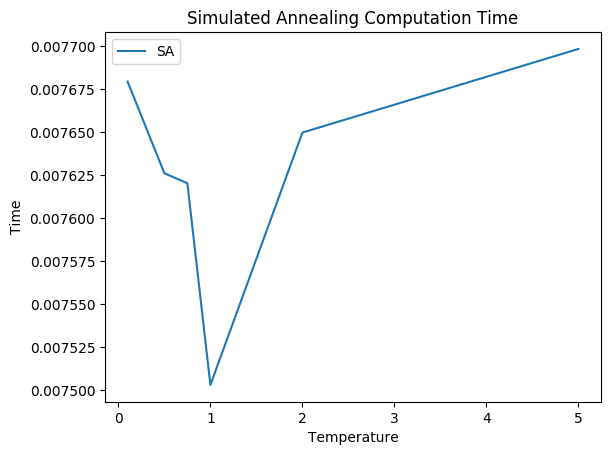

In [11]:
fig, ax = plt.subplots()
# set labels and title
ax.set_xlabel("Temperature")
ax.set_ylabel("Time")

# N Queens
ax.set_title("Simulated Annealing Computation Time")

ax.plot(sa_temp_list, time_sa_sales, label='SA')

ax.legend()
# show plot
plt.show()

### 1.3 Solve Traveling Salesman with Genetic Algorithm


In [12]:
t_ga_best_fitness = 0
ga_population_list=[10, 20, 50]
ga_mutation_list=[0.01, 0.1, 0.2]
best_pop = 0
best_mut = 0

list_t_ga_fitness_curve = []

for seed in seeds:
    time_ga_sales = []
    for population in ga_population_list:
        for mutation in ga_mutation_list:
            start = timer()
            state, fitness, fitness_curve = mlrose_hiive.genetic_alg(
                                                                tsp_problem, 
                                                                max_attempts=max_attempts, 
                                                                max_iters=max_iters, 
                                                                curve=True, 
                                                                random_state=seed,
                                                                pop_size=population,
                                                                mutation_prob=mutation)
            stop = timer()
            time_ga_sales.append(stop - start)

            if fitness > t_ga_best_fitness:
                t_ga_best_fitness = fitness
                t_ga_best_state = state
                t_ga_fitness_curve = fitness_curve
                best_pop = population
                best_mut = mutation
    list_t_ga_fitness_curve.append(t_ga_fitness_curve)
ga_time = np.mean(time_ga_sales)
print(best_pop)
print(best_mut)



50
0.1


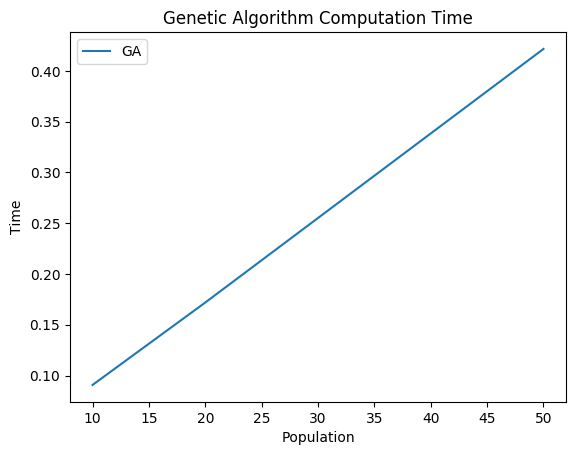

In [13]:
fig, ax = plt.subplots()
# set labels and title
ax.set_xlabel("Population")
ax.set_ylabel("Time")

time_ga_sales_pop = time_ga_sales[::4]
# N Queens
ax.set_title("Genetic Algorithm Computation Time")

ax.plot(ga_population_list, time_ga_sales_pop, label='GA')

ax.legend()
# show plot
plt.show()

### 1.4 Solve Traveling Salesman with MIMIC

In [14]:
t_mimic_best_fitness = 0
mimic_keep_list=[0.1, 0.2, 0.5]
best_keep = 0

list_t_mimic_fitness_curve = []
for seed in seeds:
    time_mimic_sales = []
    for keep in mimic_keep_list:
        start = timer()
        state, fitness, fitness_curve = mlrose_hiive.mimic(tsp_problem, 
                                                        max_attempts=max_attempts, 
                                                        max_iters=max_iters,  
                                                        curve=True, 
                                                        random_state=seed,
                                                        keep_pct=keep)
        stop = timer()
        time_mimic_sales.append(stop - start)

        if fitness > t_mimic_best_fitness:
            t_mimic_best_fitness = fitness
            t_mimic_best_state = state
            t_mimic_fitness_curve = fitness_curve
            best_keep = keep
    
    list_t_mimic_fitness_curve.append(t_mimic_fitness_curve)
    
mimic_time = np.mean(time_mimic_sales)
print(best_keep)


0.2


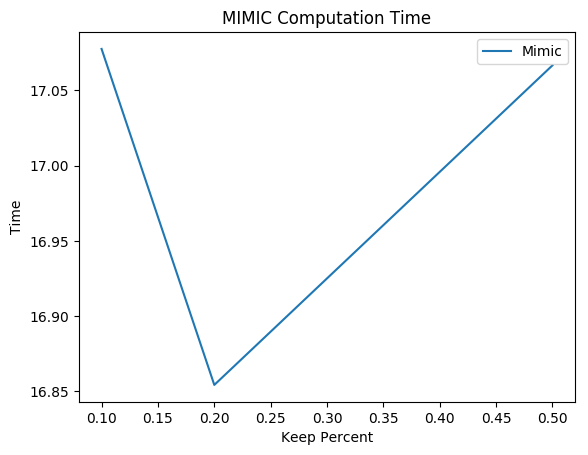

In [15]:
fig, ax = plt.subplots()
# set labels and title
ax.set_xlabel("Keep Percent")
ax.set_ylabel("Time")

ax.set_title("MIMIC Computation Time")

ax.plot(mimic_keep_list, time_mimic_sales, label='Mimic')

ax.legend()
# show plot
plt.show()

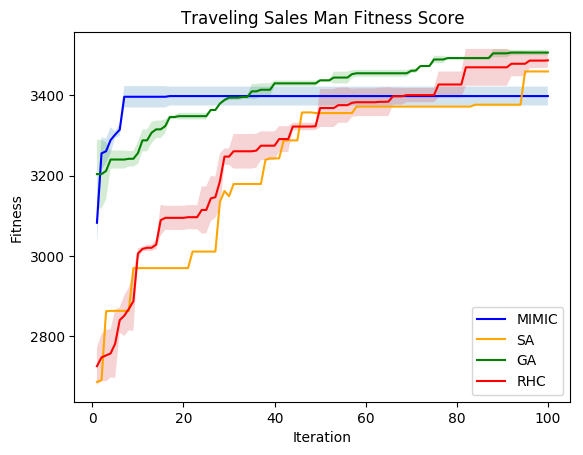

In [16]:
fig, ax = plt.subplots()
# set labels and title
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")

# N Queens
iterations = range(1, max_iters + 1)
ax.set_title("Traveling Sales Man Fitness Score")

mimic_fitness_curve = np.asarray([t[:, 0] for t in list_t_mimic_fitness_curve])
sa_fitness_curve = np.asarray([t[:, 0] for t in list_t_sa_fitness_curve])
ga_fitness_curve = np.asarray([t[:, 0] for t in list_t_ga_fitness_curve])
rhc_fitness_curve = np.asarray([t[:, 0] for t in list_t_rhc_fitness_curve])

mimic_mean = np.mean(mimic_fitness_curve, axis=0)
mimic_std = np.std(mimic_fitness_curve, axis=0)
sa_mean = np.mean(sa_fitness_curve, axis=0)
sa_std = np.std(sa_fitness_curve, axis=0)

ga_mean = np.mean(ga_fitness_curve, axis=0)
ga_std = np.std(ga_fitness_curve, axis=0)

rhc_mean = np.mean(rhc_fitness_curve, axis=0)
rhc_std = np.std(rhc_fitness_curve, axis=0)

ax.plot(iterations, mimic_mean, label='MIMIC', color='blue')
ax.plot(iterations, sa_mean, label='SA', color='orange')
ax.plot(iterations, ga_mean, label='GA', color='green')
ax.plot(iterations, rhc_mean, label='RHC', color='red')

ax.fill_between(iterations, mimic_mean - mimic_std, mimic_mean + mimic_std, alpha=0.2)
ax.fill_between(iterations, sa_mean - sa_std, sa_mean + sa_std, alpha=0.2)
ax.fill_between(iterations, ga_mean - ga_std, ga_mean + ga_std, alpha=0.2)
ax.fill_between(iterations, rhc_mean - rhc_std, rhc_mean + rhc_std, alpha=0.2)


ax.legend()
# show plot
plt.show()


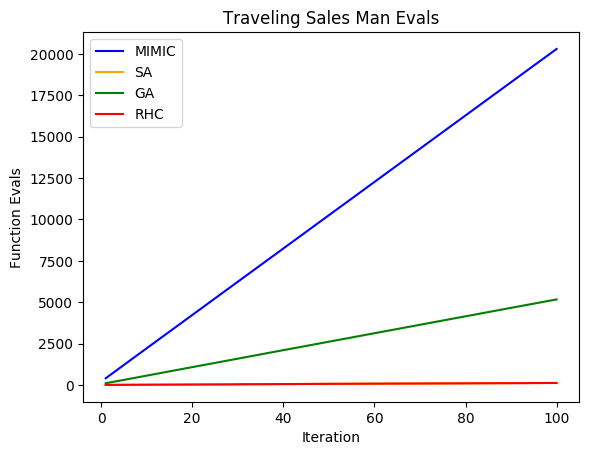

In [37]:
fig, ax = plt.subplots()
# set labels and title
ax.set_xlabel("Iteration")
ax.set_ylabel("Function Evals")

# N Queens
iterations = range(1, max_iters + 1)
ax.set_title("Traveling Sales Man Evals")

mimic_fitness_curve = np.asarray([t[:, 1] for t in list_t_mimic_fitness_curve])
sa_fitness_curve = np.asarray([t[:, 1] for t in list_t_sa_fitness_curve])
ga_fitness_curve = np.asarray([t[:, 1] for t in list_t_ga_fitness_curve])
rhc_fitness_curve = np.asarray([t[:, 1] for t in list_t_rhc_fitness_curve])

mimic_mean = np.mean(mimic_fitness_curve, axis=0)
mimic_std = np.std(mimic_fitness_curve, axis=0)
sa_mean = np.mean(sa_fitness_curve, axis=0)
sa_std = np.std(sa_fitness_curve, axis=0)

ga_mean = np.mean(ga_fitness_curve, axis=0)
ga_std = np.std(ga_fitness_curve, axis=0)

rhc_mean = np.mean(rhc_fitness_curve, axis=0)
rhc_std = np.std(rhc_fitness_curve, axis=0)

ax.plot(iterations, mimic_mean, label='MIMIC', color='blue')
ax.plot(iterations, sa_mean, label='SA', color='orange')
ax.plot(iterations, ga_mean, label='GA', color='green')
ax.plot(iterations, sa_mean, label='RHC', color='red')

ax.fill_between(iterations, mimic_mean - mimic_std, mimic_mean + mimic_std, alpha=0.2)
ax.fill_between(iterations, sa_mean - sa_std, sa_mean + sa_std, alpha=0.2)
ax.fill_between(iterations, ga_mean - ga_std, ga_mean + ga_std, alpha=0.2)
ax.fill_between(iterations, sa_mean - sa_std, sa_mean + sa_std, alpha=0.2)


ax.legend()
# show plot
plt.show()


## 2. Continuous Peaks

In [18]:
max_attempts = 100
max_iters = 100


In [19]:
#set problem
cp_fitness = mlrose_hiive.ContinuousPeaks()
cp_problem = mlrose_hiive.DiscreteOpt(length=50, fitness_fn=cp_fitness, maximize=True)

### Solve Continuous Peaks with Random Hill Climb

In [20]:
c_rhc_best_fitness = 0
rhc_restart_list = [10, 20, 50, 80, 100]
best_restart_num = 0

list_c_rhc_fitness_curve = []

for seed in seeds:
    time_rhc_sales = []
    for restart_num in rhc_restart_list:
        start = timer()
        state, fitness, fitness_curve = mlrose_hiive.random_hill_climb(cp_problem, 
                                                                    max_attempts = max_attempts, 
                                                                     max_iters=max_iters, 
                                                                     curve=True, 
                                                                     random_state=seed,
                                                                    restarts=restart_num)
        stop = timer()
        time_rhc_sales.append(stop - start)
        if fitness > c_rhc_best_fitness:
            c_rhc_best_fitness = fitness
            c_rhc_best_state = state
            c_rhc_fitness_curve = fitness_curve
            best_restart_num = restart_num
    list_c_rhc_fitness_curve.append(c_rhc_fitness_curve)

c_rhc_time = np.mean(time_rhc_sales)
print(best_restart_num)


100


### Solve Continuous Peaks with Simulated Annealing

In [21]:
c_sa_best_fitness = 0
sa_temp_list = [0.1, 0.5, 0.75, 1.0, 2.0, 5.0]
best_temp = -1

list_c_sa_fitness_curve = []

for seed in seeds:
    time_sa_sales = []

    for temp in sa_temp_list:
        start = timer()
        state, fitness, fitness_curve = mlrose_hiive.simulated_annealing(
                                                        cp_problem, 
                                                        max_attempts=max_attempts, 
                                                        max_iters=max_iters, 
                                                        curve=True, 
                                                        random_state=seed,
                                                        schedule=mlrose_hiive.GeomDecay(init_temp = temp, decay=0.1, min_temp=temp))
        stop = timer()
        time_sa_sales.append(stop - start)
        if fitness > c_sa_best_fitness:
            c_sa_best_fitness = fitness
            c_sa_best_state = state
            c_sa_fitness_curve = fitness_curve
            best_temp = temp
    list_c_sa_fitness_curve.append(c_sa_fitness_curve)

sa_time = np.mean(time_sa_sales)
print(best_temp)
        
        

0.1


### Solve Continuous Peaks with Genetic Algorithm


In [22]:
c_ga_best_fitness = 0
ga_population_list=[10, 20, 50]
ga_mutation_list=[0.01, 0.1, 0.2]
best_pop = 0
best_mut = 0

list_c_ga_fitness_curve = []
for seed in seeds:
    time_ga_cp = []

    for population in ga_population_list:
        for mutation in ga_mutation_list:
            start = timer()
            state, fitness, fitness_curve = mlrose_hiive.genetic_alg(
                                                                cp_problem, 
                                                                max_attempts=max_attempts, 
                                                                max_iters=max_iters, 
                                                                curve=True, 
                                                                random_state=seed,
                                                                pop_size=population,
                                                                mutation_prob=mutation)
            stop = timer()
            time_ga_sales.append(stop - start)

            if fitness > c_ga_best_fitness:
                c_ga_best_fitness = fitness
                c_ga_best_state = state
                c_ga_fitness_curve = fitness_curve
                best_pop = population
                best_mut = mutation
    list_c_ga_fitness_curve.append(c_ga_fitness_curve)

        
ga_time = np.mean(time_ga_cp)
print(best_pop)
print(best_mut)



50
0.1


### Solve Continuous Peaks with MIMIC

In [23]:
c_mimic_best_fitness = 0
mimic_keep_list=[0.01, 0.1, 0.2, 0.5]
best_keep = 0
list_c_mimic_fitness_curve = []

for seed in seeds:
    time_mimic_sales = []

    for keep in mimic_keep_list:
        start = timer()
        state, fitness, fitness_curve = mlrose_hiive.mimic( cp_problem, 
                                                            max_attempts=max_attempts, 
                                                            max_iters=max_iters,  
                                                            curve = True, 
                                                            random_state = seed,
                                                            keep_pct=keep)
        stop = timer()
        time_mimic_sales.append(stop - start)

        if fitness > c_mimic_best_fitness:
            c_mimic_best_fitness = fitness
            c_mimic_best_state = state
            c_mimic_fitness_curve = fitness_curve
            best_keep = keep
    list_c_mimic_fitness_curve.append(c_mimic_fitness_curve)
        
mimic_time = np.mean(time_mimic_sales)
print(best_keep)


0.1


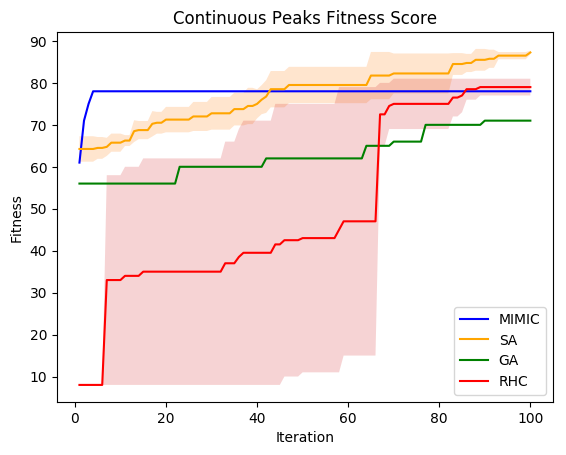

In [24]:
fig, ax = plt.subplots()
# set labels and title
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")

# N Queens
iterations = range(1, max_iters + 1)
ax.set_title("Continuous Peaks Fitness Score")

mimic_fitness_curve = np.asarray([c[:, 0] for c in list_c_mimic_fitness_curve])
sa_fitness_curve = np.asarray([c[:, 0] for c in list_c_sa_fitness_curve])
ga_fitness_curve = np.asarray([c[:, 0] for c in list_c_ga_fitness_curve])
rhc_fitness_curve = np.asarray([c[:, 0] for c in list_c_rhc_fitness_curve])

mimic_mean = np.mean(mimic_fitness_curve, axis=0)
mimic_std = np.std(mimic_fitness_curve, axis=0)
sa_mean = np.mean(sa_fitness_curve, axis=0)
sa_std = np.std(sa_fitness_curve, axis=0)

ga_mean = np.mean(ga_fitness_curve, axis=0)
ga_std = np.std(ga_fitness_curve, axis=0)

rhc_mean = np.mean(rhc_fitness_curve, axis=0)
rhc_std = np.std(rhc_fitness_curve, axis=0)

ax.plot(iterations, mimic_mean, label='MIMIC', color='blue')
ax.plot(iterations, ga_mean, label='SA', color='orange')
ax.plot(iterations, sa_mean, label='GA', color='green')
ax.plot(iterations, rhc_mean, label='RHC', color='red')

ax.fill_between(iterations, mimic_mean - mimic_std, mimic_mean + mimic_std, alpha=0.2)
ax.fill_between(iterations, ga_mean - ga_std, ga_mean + ga_std, alpha=0.2)
ax.fill_between(iterations, sa_mean - sa_std, sa_mean + sa_std, alpha=0.2)
ax.fill_between(iterations, rhc_mean - rhc_std, rhc_mean + rhc_std, alpha=0.2)


ax.legend()
# show plot
plt.show()

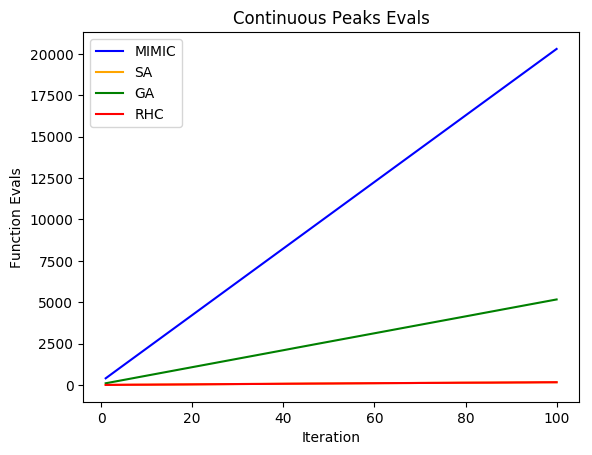

In [38]:
fig, ax = plt.subplots()
# set labels and title
ax.set_xlabel("Iteration")
ax.set_ylabel("Function Evals")

# N Queens
iterations = range(1, max_iters + 1)
ax.set_title("Continuous Peaks Evals")

mimic_fitness_curve = np.asarray([c[:, 1] for c in list_c_mimic_fitness_curve])
sa_fitness_curve = np.asarray([c[:, 1] for c in list_c_sa_fitness_curve])
ga_fitness_curve = np.asarray([c[:, 1] for c in list_c_ga_fitness_curve])
rhc_fitness_curve = np.asarray([c[:, 1] for c in list_c_rhc_fitness_curve])

mimic_mean = np.mean(mimic_fitness_curve, axis=0)
mimic_std = np.std(mimic_fitness_curve, axis=0)
sa_mean = np.mean(sa_fitness_curve, axis=0)
sa_std = np.std(sa_fitness_curve, axis=0)

ga_mean = np.mean(ga_fitness_curve, axis=0)
ga_std = np.std(ga_fitness_curve, axis=0)

rhc_mean = np.mean(rhc_fitness_curve, axis=0)
rhc_std = np.std(rhc_fitness_curve, axis=0)

ax.plot(iterations, mimic_mean, label='MIMIC', color='blue')
ax.plot(iterations, sa_mean, label='SA', color='orange')
ax.plot(iterations, ga_mean, label='GA', color='green')
ax.plot(iterations, sa_mean, label='RHC', color='red')

ax.fill_between(iterations, mimic_mean - mimic_std, mimic_mean + mimic_std, alpha=0.2)
ax.fill_between(iterations, sa_mean - sa_std, sa_mean + sa_std, alpha=0.2)
ax.fill_between(iterations, ga_mean - ga_std, ga_mean + ga_std, alpha=0.2)
ax.fill_between(iterations, sa_mean - sa_std, sa_mean + sa_std, alpha=0.2)


ax.legend()
# show plot
plt.show()

## 3. Four peaks

In [26]:
max_attempts = 100
max_iters = 100

In [27]:
# Problem definition
fp_fitness = mlrose_hiive.FourPeaks()
fp_problem = mlrose_hiive.DiscreteOpt(length=30, fitness_fn=fp_fitness, maximize=True)


### Solve Four peaks with Random Hill Climb

In [28]:
f_rhc_best_fitness = 0
rhc_restart_list = [10, 20, 50, 80, 100]
best_restart_num = 0

list_f_rhc_fitness_curve = []

for seed in seeds:
    time_rhc_sales = []

    for restart_num in rhc_restart_list:
        start = timer()
        state, fitness, fitness_curve = mlrose_hiive.random_hill_climb(fp_problem, 
                                                                    max_attempts = max_attempts, 
                                                                     max_iters=max_iters, 
                                                                     curve=True, 
                                                                     random_state=seed,
                                                                    restarts=restart_num)
        stop = timer()
        time_rhc_sales.append(stop - start)
        if fitness > f_rhc_best_fitness:
            f_rhc_best_fitness = fitness
            f_rhc_best_state = state
            f_rhc_fitness_curve = fitness_curve
            best_restart_num = restart_num
    list_f_rhc_fitness_curve.append(f_rhc_fitness_curve)

f_rhc_time = np.mean(time_rhc_sales)
print(best_restart_num)



50


### Solve Four peaks with Simulated Annealing

In [29]:
f_sa_best_fitness = 0
sa_temp_list = [0.1, 0.5, 0.75, 1.0, 2.0, 5.0]
best_temp = -1
list_f_sa_fitness_curve = []

for seed in seeds:
    time_sa_fp = []

    for temp in sa_temp_list:
        start = timer()
        state, fitness, fitness_curve = mlrose_hiive.simulated_annealing(
                                                        fp_problem, 
                                                        max_attempts=max_attempts, 
                                                        max_iters=max_iters, 
                                                        curve=True, 
                                                        random_state=seed,
                                                        schedule=mlrose_hiive.GeomDecay(init_temp = temp, decay=0.1, min_temp=temp))
        stop = timer()
        time_sa_fp.append(stop - start)
        if fitness > f_sa_best_fitness:
            f_sa_best_fitness = fitness
            f_sa_best_state = state
            f_sa_fitness_curve = fitness_curve
            best_temp = temp
    list_f_sa_fitness_curve.append(f_sa_fitness_curve)

    
sa_time = np.mean(time_sa_fp)
print(best_temp)
        
        

0.1


### Solve Four peaks with Genetic Algorithm


In [30]:
f_ga_best_fitness = 0
ga_population_list=[10, 20, 50]
ga_mutation_list=[0.1, 0.2, 0.01]
best_pop = 0
best_mut = 0
list_f_ga_fitness_curve = []
for seed in seeds:
    time_ga_fp = []

    for population in ga_population_list:
        for mutation in ga_mutation_list:
            start = timer()
            state, fitness, fitness_curve = mlrose_hiive.genetic_alg(
                                                                fp_problem, 
                                                                max_attempts=max_attempts, 
                                                                max_iters=max_iters, 
                                                                curve=True, 
                                                                random_state=seed,
                                                                pop_size=population,
                                                                mutation_prob=mutation)
            stop = timer()
            time_ga_fp.append(stop - start)

            if fitness > f_sa_best_fitness:
                f_ga_best_fitness = fitness
                f_ga_best_state = state
                f_ga_fitness_curve = fitness_curve
                best_pop = population
                best_mut = mutation
                    
    list_f_ga_fitness_curve.append(f_ga_fitness_curve)

        
ga_time = np.mean(time_ga_fp)
print(best_pop)
print(best_mut)



50
0.01


### Solve Four peaks with MIMIC

In [31]:
f_mimic_best_fitness = 0
mimic_keep_list=[0.01, 0.1, 0.2, 0.5]
best_keep = 0

list_f_mimic_fitness_curve = []
for seed in seeds:
    time_mimic_ = []

    for keep in mimic_keep_list:
        start = timer()
        state, fitness, fitness_curve = mlrose_hiive.mimic( fp_problem, 
                                                            max_attempts=max_attempts, 
                                                            max_iters=max_iters,  
                                                            curve = True, 
                                                            random_state = seed,
                                                            keep_pct=keep)
        stop = timer()
        time_mimic_sales.append(stop - start)

        if fitness > f_mimic_best_fitness:
            f_mimic_best_fitness = fitness
            f_mimic_best_state = state
            f_mimic_fitness_curve = fitness_curve
            best_keep = keep
    list_f_mimic_fitness_curve.append(f_mimic_fitness_curve)
        
mimic_time = np.mean(time_mimic_sales)
print(best_keep)


0.2


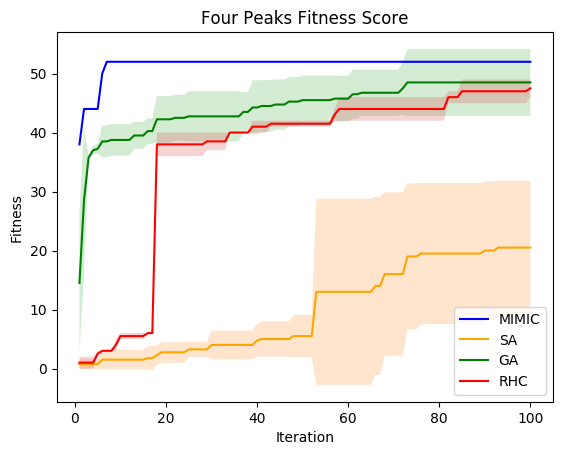

In [32]:
fig, ax = plt.subplots()
# set labels and title
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")

# N Queens
iterations = range(1, max_iters + 1)
ax.set_title("Four Peaks Fitness Score")

mimic_fitness_curve = np.asarray([f[:, 0] for f in list_f_mimic_fitness_curve])
sa_fitness_curve = np.asarray([f[:, 0] for f in list_f_sa_fitness_curve])
ga_fitness_curve = np.asarray([f[:, 0] for f in list_f_ga_fitness_curve])
rhc_fitness_curve = np.asarray([f[:, 0] for f in list_f_rhc_fitness_curve])

mimic_mean = np.mean(mimic_fitness_curve, axis=0)
mimic_std = np.std(mimic_fitness_curve, axis=0)
sa_mean = np.mean(sa_fitness_curve, axis=0)
sa_std = np.std(sa_fitness_curve, axis=0)

ga_mean = np.mean(ga_fitness_curve, axis=0)
ga_std = np.std(ga_fitness_curve, axis=0)

rhc_mean = np.mean(rhc_fitness_curve, axis=0)
rhc_std = np.std(rhc_fitness_curve, axis=0)

ax.plot(iterations, mimic_mean, label='MIMIC', color='blue')
ax.plot(iterations, sa_mean, label='SA', color='orange')
ax.plot(iterations, ga_mean, label='GA', color='green')
ax.plot(iterations, rhc_mean, label='RHC', color='red')

ax.fill_between(iterations, mimic_mean - mimic_std, mimic_mean + mimic_std, alpha=0.2)
ax.fill_between(iterations, sa_mean - sa_std, sa_mean + sa_std, alpha=0.2)
ax.fill_between(iterations, ga_mean - ga_std, ga_mean + ga_std, alpha=0.2)
ax.fill_between(iterations, rhc_mean - rhc_std, rhc_mean + rhc_std, alpha=0.2)


ax.legend()
# show plot
plt.show()

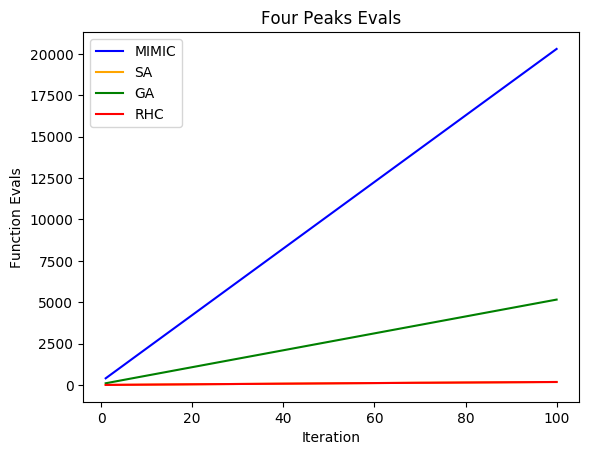

In [39]:
fig, ax = plt.subplots()
# set labels and title
ax.set_xlabel("Iteration")
ax.set_ylabel("Function Evals")

# N Queens
iterations = range(1, max_iters + 1)
ax.set_title("Four Peaks Evals")

mimic_fitness_curve = np.asarray([f[:, 1] for f in list_f_mimic_fitness_curve])
sa_fitness_curve = np.asarray([f[:, 1] for f in list_f_sa_fitness_curve])
ga_fitness_curve = np.asarray([f[:, 1] for f in list_f_ga_fitness_curve])
rhc_fitness_curve = np.asarray([f[:, 1] for f in list_f_rhc_fitness_curve])

mimic_mean = np.mean(mimic_fitness_curve, axis=0)
mimic_std = np.std(mimic_fitness_curve, axis=0)
sa_mean = np.mean(sa_fitness_curve, axis=0)
sa_std = np.std(sa_fitness_curve, axis=0)

ga_mean = np.mean(ga_fitness_curve, axis=0)
ga_std = np.std(ga_fitness_curve, axis=0)

rhc_mean = np.mean(rhc_fitness_curve, axis=0)
rhc_std = np.std(rhc_fitness_curve, axis=0)

ax.plot(iterations, mimic_mean, label='MIMIC', color='blue')
ax.plot(iterations, sa_mean, label='SA', color='orange')
ax.plot(iterations, ga_mean, label='GA', color='green')
ax.plot(iterations, sa_mean, label='RHC', color='red')

ax.fill_between(iterations, mimic_mean - mimic_std, mimic_mean + mimic_std, alpha=0.2)
ax.fill_between(iterations, sa_mean - sa_std, sa_mean + sa_std, alpha=0.2)
ax.fill_between(iterations, ga_mean - ga_std, ga_mean + ga_std, alpha=0.2)
ax.fill_between(iterations, sa_mean - sa_std, sa_mean + sa_std, alpha=0.2)


ax.legend()
# show plot
plt.show()

# Experiment: different problem sizes' running time

## TSP

In [47]:
# tsp rhc

t_rhc_best_fitness = 0
rhc_restart_list = [10, 20, 50, 80, 100]
best_restart_num = 0

tsp_problem_sizes = [5, 10, 20, 50, 100]

def create_tsp(size):
    number_of_cities = size

    x_coords = np.random.randint(area_width, size=number_of_cities)
    y_coords = np.random.randint(area_height, size=number_of_cities)

    coords = list(tuple(zip(x_coords, y_coords)))
    duplicates = list_duplicates_(coords)

    while len(duplicates) > 0:
        for d in duplicates:
            x_coords = np.random.randint(area_width, size=len(d))
            y_coords = np.random.randint(area_height, size=len(d))
            for i in range(len(d)):
                coords[d[i]] = (x_coords[i], y_coords[i])
                pass
        duplicates = list_duplicates_(coords)
    distances = get_distances(coords, False)

    g = nx.Graph()
    for a, b, distance in distances:

        g.add_edge(a, b, length=int(round(distance)))

    tsp_problem = TSPOpt(coords=coords, distances=distances, maximize=True, source_graph=g) 
    
    return tsp_problem


time_rhc_sales_size = []
size_best_restart_num = []
fitness_rhc_sales_size = []

for size in tsp_problem_sizes:
    size_tsp_problem = create_tsp(size)
    
    time_rhc_sales_single = []
    for restart_num in rhc_restart_list:
        start = timer()
        state, fitness, fitness_curve = mlrose_hiive.random_hill_climb(size_tsp_problem, 
                                                                    max_attempts = max_attempts, 
                                                                     max_iters=max_iters, 
                                                                     curve=True, 
                                                                     random_state=5,
                                                                    restarts=restart_num)
        stop = timer()
        time_rhc_sales_single.append(stop - start)
        if fitness > t_rhc_best_fitness:
            t_rhc_best_fitness = fitness
            t_rhc_best_state = state
            t_rhc_fitness_curve = fitness_curve
            best_restart_num = restart_num
    size_best_restart_num.append(best_restart_num)  
    time_rhc_sales_size.append(np.mean(time_rhc_sales_single))
    fitness_rhc_sales_size.append(t_rhc_best_fitness)

    


In [48]:
print(size_best_restart_num)
print(time_rhc_sales_size)

[10, 10, 100, 50, 50]
[0.31335855779998384, 0.3374732304000645, 0.37044991420025325, 0.4945206386000791, 0.7110006515998976]


In [49]:
# tsp sa
t_sa_best_fitness = 0
sa_temp_list = [0.1, 0.5, 0.75, 1.0, 2.0, 5.0]
best_temp = -1

time_sa_sales_size = []
size_best_temp = []
fitness_sa_sales_size = []

for size in tsp_problem_sizes:
    size_tsp_problem = create_tsp(size)
    
    time_sa_sales_single = []

    for temp in sa_temp_list:
        start = timer()
        state, fitness, fitness_curve = mlrose_hiive.simulated_annealing(
                                                        size_tsp_problem, 
                                                        max_attempts=max_attempts, 
                                                        max_iters=max_iters, 
                                                        curve=True, 
                                                        random_state=5,
                                                        schedule=mlrose_hiive.GeomDecay(init_temp = temp, decay=0.1, min_temp=temp))
        stop = timer()
        time_sa_sales_single.append(stop - start)
        if fitness > t_sa_best_fitness:
            t_sa_best_fitness = fitness
            t_sa_best_state = state
            t_sa_fitness_curve = fitness_curve
            best_temp = temp
    size_best_temp.append(best_temp)  
    time_sa_sales_size.append(np.mean(time_sa_sales_single))
    fitness_sa_sales_size.append(t_sa_best_fitness)



In [50]:
print(size_best_temp)
print(time_sa_sales_size)

[0.1, 5.0, 5.0, 0.1, 0.1]
[0.007209208333430676, 0.006611344333274853, 0.007644443166554993, 0.010019329833388232, 0.014068347499839243]


In [51]:
# tsp ga

t_ga_best_fitness = 0
ga_population_list=[10, 20, 50]
ga_mutation_list=[0.01, 0.1, 0.2]
best_pop = 0
best_mut = 0

time_ga_sales_size = []
size_best_pop = []
size_best_mut = []
fitness_ga_sales_size = []

for size in tsp_problem_sizes:
    size_tsp_problem = create_tsp(size)
    
    time_ga_sales_single = []
    for population in ga_population_list:
        for mutation in ga_mutation_list:
            start = timer()
            state, fitness, fitness_curve = mlrose_hiive.genetic_alg(
                                                                size_tsp_problem, 
                                                                max_attempts=max_attempts, 
                                                                max_iters=max_iters, 
                                                                curve=True, 
                                                                random_state=5,
                                                                pop_size=population,
                                                                mutation_prob=mutation)
            stop = timer()
            time_ga_sales_single.append(stop - start)

            if fitness > t_ga_best_fitness:
                t_ga_best_fitness = fitness
                t_ga_best_state = state
                t_ga_fitness_curve = fitness_curve
                best_pop = population
                best_mut = mutation
    size_best_pop.append(best_pop)  
    size_best_mut.append(best_mut) 
    time_ga_sales_size.append(np.mean(time_ga_sales_single))
    fitness_ga_sales_size.append(t_ga_best_fitness)



In [52]:
print(size_best_pop)
print(size_best_mut)

print(time_ga_sales_size)

[10, 50, 50, 50, 50]
[0.2, 0.01, 0.2, 0.2, 0.1]
[0.14146687911094583, 0.16363651711112148, 0.22467860777790824, 0.4095582610002061, 0.7176754127775793]


In [53]:
t_mimic_best_fitness = 0
mimic_keep_list=[0.1, 0.2, 0.5]
best_keep = 0

time_mimic_sales_size = []
size_best_keep = []
fitness_mimic_sales_size = []

for size in tsp_problem_sizes:
    size_tsp_problem = create_tsp(size)
    
    time_mimic_sales_single = []

    for keep in mimic_keep_list:
        start = timer()
        state, fitness, fitness_curve = mlrose_hiive.mimic(size_tsp_problem, 
                                                        max_attempts=max_attempts, 
                                                        max_iters=max_iters,  
                                                        curve=True, 
                                                        random_state=5,
                                                        keep_pct=keep)
        stop = timer()
        time_mimic_sales_single.append(stop - start)

        if fitness > t_mimic_best_fitness:
            t_mimic_best_fitness = fitness
            t_mimic_best_state = state
            t_mimic_fitness_curve = fitness_curve
            best_keep = keep
    
    size_best_keep.append(best_keep)  
    time_mimic_sales_size.append(np.mean(time_mimic_sales_single))
    fitness_mimic_sales_size.append(t_mimic_best_fitness)


In [54]:
print(size_best_keep)
print(time_mimic_sales_size)


[0.2, 0.5, 0.5, 0.5, 0.5]
[3.3433453183330735, 6.977008876333154, 16.79533366500012, 69.36668546033343, 252.39307148999947]


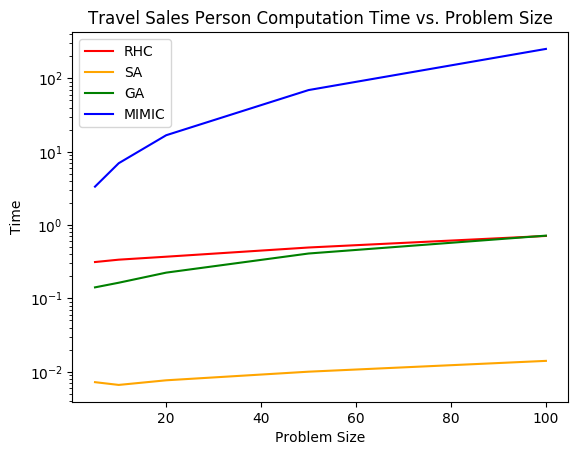

In [83]:
fig, ax = plt.subplots()
# set labels and title
ax.set_xlabel("Problem Size")
ax.set_ylabel("Time")

ax.set_title("Travel Sales Person Computation Time vs. Problem Size")
plt.semilogy()

ax.plot(tsp_problem_sizes, time_rhc_sales_size, label='RHC', color='red')
ax.plot(tsp_problem_sizes, time_sa_sales_size, label='SA', color='orange')
ax.plot(tsp_problem_sizes, time_ga_sales_size, label='GA', color='green')
ax.plot(tsp_problem_sizes, time_mimic_sales_size, label='MIMIC', color='blue')

ax.legend()
# show plot
plt.show()

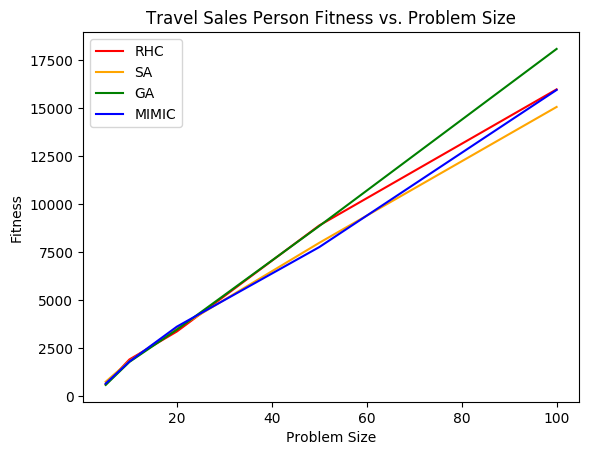

In [56]:
fig, ax = plt.subplots()
# set labels and title
ax.set_xlabel("Problem Size")
ax.set_ylabel("Fitness")

ax.set_title("Travel Sales Person Fitness vs. Problem Size")

ax.plot(tsp_problem_sizes, fitness_rhc_sales_size, label='RHC', color='red')
ax.plot(tsp_problem_sizes, fitness_sa_sales_size, label='SA', color='orange')
ax.plot(tsp_problem_sizes, fitness_ga_sales_size, label='GA', color='green')
ax.plot(tsp_problem_sizes, fitness_mimic_sales_size, label='MIMIC', color='blue')

ax.legend()
# show plot
plt.show()

## Continous peak

In [57]:
#set problem
cp_fitness = mlrose_hiive.ContinuousPeaks()


In [58]:
# cp rhc

t_rhc_best_fitness = 0
rhc_restart_list = [10, 20, 50, 80, 100]
best_restart_num = 0

cp_problem_sizes = [5, 10, 20, 50, 100]

time_rhc_cp_size = []
size_best_restart_num = []
fitness_rhc_cp_size = []


for size in cp_problem_sizes:
    size_cp_problem = mlrose_hiive.DiscreteOpt(length=size, fitness_fn=cp_fitness, maximize=True)
    time_rhc_cp_single = []
    for restart_num in rhc_restart_list:
        start = timer()
        state, fitness, fitness_curve = mlrose_hiive.random_hill_climb(size_cp_problem, 
                                                                    max_attempts = max_attempts, 
                                                                     max_iters=max_iters, 
                                                                     curve=True, 
                                                                     random_state=5,
                                                                    restarts=restart_num)
        stop = timer()
        time_rhc_cp_single.append(stop - start)
        if fitness > t_rhc_best_fitness:
            t_rhc_best_fitness = fitness
            t_rhc_best_state = state
            t_rhc_fitness_curve = fitness_curve
            best_restart_num = restart_num
    size_best_restart_num.append(best_restart_num)  
    time_rhc_cp_size.append(np.mean(time_rhc_cp_single))
    fitness_rhc_cp_size.append(t_rhc_best_fitness)



In [59]:
print(size_best_restart_num)
print(time_rhc_cp_size)

[10, 10, 10, 100, 50]
[0.07606199340007151, 0.05433351600004244, 0.07442975660032972, 0.14066555319986945, 0.2259259321999707]


In [60]:
# cp sa
t_sa_best_fitness = 0
sa_temp_list = [0.1, 0.5, 0.75, 1.0, 2.0, 5.0]
best_temp = -1

time_sa_cp_size = []
size_best_temp = []
fitness_sa_cp_size = []

for size in cp_problem_sizes:
    size_cp_problem = mlrose_hiive.DiscreteOpt(length=size, fitness_fn=cp_fitness, maximize=True)
    
    time_sa_cp_single = []

    for temp in sa_temp_list:
        start = timer()
        state, fitness, fitness_curve = mlrose_hiive.simulated_annealing(
                                                        size_cp_problem, 
                                                        max_attempts=max_attempts, 
                                                        max_iters=max_iters, 
                                                        curve=True, 
                                                        random_state=5,
                                                        schedule=mlrose_hiive.GeomDecay(init_temp = temp, decay=0.1, min_temp=temp))
        stop = timer()
        time_sa_cp_single.append(stop - start)
        if fitness > t_sa_best_fitness:
            t_sa_best_fitness = fitness
            t_sa_best_state = state
            t_sa_fitness_curve = fitness_curve
            best_temp = temp
    size_best_temp.append(best_temp)  
    time_sa_cp_size.append(np.mean(time_sa_cp_single))
    fitness_sa_cp_size.append(t_sa_best_fitness)


In [61]:
print(size_best_temp)
print(time_sa_cp_size)

[0.1, 0.1, 0.5, 0.5, 0.5]
[0.0026162299999062575, 0.0017193306666740682, 0.002183453000119092, 0.00436458399978316, 0.0077463513331773965]


In [62]:
# cp ga

t_ga_best_fitness = 0
ga_population_list=[10, 20, 50]
ga_mutation_list=[0.01, 0.1, 0.2]
best_pop = 0
best_mut = 0

time_ga_cp_size = []
size_best_pop = []
size_best_mut = []

fitness_ga_cp_size = []

for size in cp_problem_sizes:
    size_cp_problem = mlrose_hiive.DiscreteOpt(length=size, fitness_fn=cp_fitness, maximize=True)
    
    time_ga_cp_single = []
    for population in ga_population_list:
        for mutation in ga_mutation_list:
            start = timer()
            state, fitness, fitness_curve = mlrose_hiive.genetic_alg(
                                                                size_cp_problem, 
                                                                max_attempts=max_attempts, 
                                                                max_iters=max_iters, 
                                                                curve=True, 
                                                                random_state=5,
                                                                pop_size=population,
                                                                mutation_prob=mutation)
            stop = timer()
            time_ga_cp_single.append(stop - start)

            if fitness > t_ga_best_fitness:
                t_ga_best_fitness = fitness
                t_ga_best_state = state
                t_ga_fitness_curve = fitness_curve
                best_pop = population
                best_mut = mutation
    size_best_pop.append(best_pop)  
    size_best_mut.append(best_mut) 
    time_ga_cp_size.append(np.mean(time_ga_cp_single))
    fitness_ga_cp_size.append(t_ga_best_fitness)

    


In [63]:
print(size_best_pop)
print(size_best_mut)

print(time_ga_cp_size)

[10, 10, 20, 50, 50]
[0.01, 0.1, 0.2, 0.1, 0.1]
[0.07609448200006834, 0.08087093633346537, 0.09118219422210434, 0.11974833633323417, 0.16886912055552886]


In [64]:
# cp mimic
t_mimic_best_fitness = 0
mimic_keep_list=[0.1, 0.2, 0.5]
best_keep = 0

time_mimic_cp_size = []
size_best_keep = []
fitness_mimic_cp_size = []

for size in cp_problem_sizes:
    size_cp_problem = mlrose_hiive.DiscreteOpt(length=size, fitness_fn=cp_fitness, maximize=True)
    
    time_mimic_cp_single = []

    for keep in mimic_keep_list:
        start = timer()
        state, fitness, fitness_curve = mlrose_hiive.mimic(size_cp_problem, 
                                                        max_attempts=max_attempts, 
                                                        max_iters=max_iters,  
                                                        curve=True, 
                                                        random_state=5,
                                                        keep_pct=keep)
        stop = timer()
        time_mimic_cp_single.append(stop - start)

        if fitness > t_mimic_best_fitness:
            t_mimic_best_fitness = fitness
            t_mimic_best_state = state
            t_mimic_fitness_curve = fitness_curve
            best_keep = keep
    
    size_best_keep.append(best_keep)  
    time_mimic_cp_size.append(np.mean(time_mimic_cp_single))
    fitness_mimic_cp_size.append(t_mimic_best_fitness)


In [65]:
print(size_best_keep)
print(time_mimic_cp_size)


[0.1, 0.1, 0.1, 0.5, 0.2]
[0.5614339966668922, 1.750717646666999, 6.532990981666444, 39.71738272600002, 159.03614427666707]


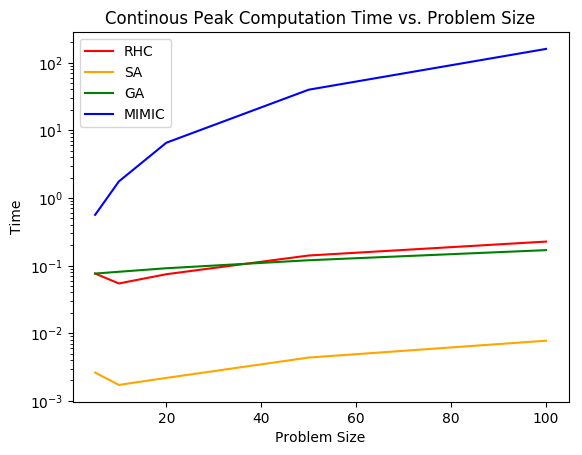

In [84]:

fig, ax = plt.subplots()
# set labels and title
ax.set_xlabel("Problem Size")
ax.set_ylabel("Time")

ax.set_title("Continous Peak Computation Time vs. Problem Size")
plt.semilogy()

ax.plot(tsp_problem_sizes, time_rhc_cp_size, label='RHC', color='red')
ax.plot(tsp_problem_sizes, time_sa_cp_size, label='SA', color='orange')
ax.plot(tsp_problem_sizes, time_ga_cp_size, label='GA', color='green')
ax.plot(tsp_problem_sizes, time_mimic_cp_size, label='MIMIC', color='blue')

ax.legend()
# show plot
plt.show()

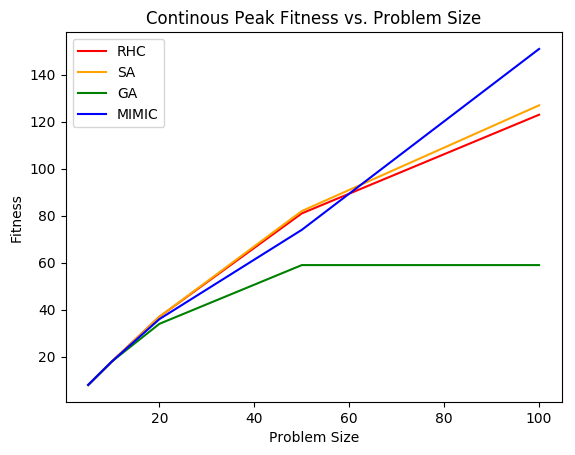

In [79]:
fig, ax = plt.subplots()
# set labels and title
ax.set_xlabel("Problem Size")
ax.set_ylabel("Fitness")

ax.set_title("Continous Peak Fitness vs. Problem Size")

ax.plot(cp_problem_sizes, fitness_rhc_cp_size, label='RHC', color='red')
ax.plot(cp_problem_sizes, fitness_ga_cp_size, label='SA', color='orange')
ax.plot(cp_problem_sizes, fitness_sa_cp_size, label='GA', color='green')
ax.plot(cp_problem_sizes, fitness_mimic_cp_size, label='MIMIC', color='blue')

ax.legend()
# show plot
plt.show()

## Four peak

In [68]:
#set problem
fp_fitness = mlrose_hiive.FourPeaks()


In [69]:
# fp rhc

t_rhc_best_fitness = 0
rhc_restart_list = [10, 20, 50, 80, 100]
best_restart_num = 0

fp_problem_sizes = [5, 10, 20, 50, 100]

time_rhc_fp_size = []
size_best_restart_num = []
fitness_rhc_fp_size = []


for size in fp_problem_sizes:
    size_fp_problem = mlrose_hiive.DiscreteOpt(length=size, fitness_fn=fp_fitness, maximize=True)
    time_rhc_fp_single = []
    for restart_num in rhc_restart_list:
        start = timer()
        state, fitness, fitness_curve = mlrose_hiive.random_hill_climb(size_fp_problem, 
                                                                    max_attempts = max_attempts, 
                                                                     max_iters=max_iters, 
                                                                     curve=True, 
                                                                     random_state=5,
                                                                    restarts=restart_num)
        stop = timer()
        time_rhc_fp_single.append(stop - start)
        if fitness > t_rhc_best_fitness:
            t_rhc_best_fitness = fitness
            t_rhc_best_state = state
            t_rhc_fitness_curve = fitness_curve
            best_restart_num = restart_num
    size_best_restart_num.append(best_restart_num)  
    time_rhc_fp_size.append(np.mean(time_rhc_fp_single))
    
    fitness_rhc_fp_size.append(t_rhc_best_fitness)


In [70]:
print(size_best_restart_num)
print(time_rhc_fp_size)

[10, 10, 10, 100, 100]
[0.04550659659980738, 0.037566290999893684, 0.03852528839979641, 0.03551969399995869, 0.034233695800139685]


In [71]:
# fp sa
t_sa_best_fitness = 0
sa_temp_list = [0.1, 0.5, 0.75, 1.0, 2.0, 5.0]
best_temp = -1

time_sa_fp_size = []
size_best_temp = []
fitness_sa_fp_size = []

for size in fp_problem_sizes:
    size_fp_problem = mlrose_hiive.DiscreteOpt(length=size, fitness_fn=fp_fitness, maximize=True)
    
    time_sa_fp_single = []

    for temp in sa_temp_list:
        start = timer()
        state, fitness, fitness_curve = mlrose_hiive.simulated_annealing(
                                                        size_fp_problem, 
                                                        max_attempts=max_attempts, 
                                                        max_iters=max_iters, 
                                                        curve=True, 
                                                        random_state=5,
                                                        schedule=mlrose_hiive.GeomDecay(init_temp = temp, decay=0.1, min_temp=temp))
        stop = timer()
        time_sa_fp_single.append(stop - start)
        if fitness > t_sa_best_fitness:
            t_sa_best_fitness = fitness
            t_sa_best_state = state
            t_sa_fitness_curve = fitness_curve
            best_temp = temp
    size_best_temp.append(best_temp)  
    time_sa_fp_size.append(np.mean(time_sa_fp_single))
    fitness_sa_fp_size.append(t_sa_best_fitness)


In [72]:
print(size_best_temp)
print(time_sa_fp_size)

[0.5, 0.1, 0.1, 0.1, 0.1]
[0.0020514534999165335, 0.001056111166841826, 0.0011566276665083326, 0.001208315833537199, 0.0011139193331170343]


In [73]:
# fp ga

t_ga_best_fitness = 0
ga_population_list=[10, 20, 50]
ga_mutation_list=[0.01, 0.1, 0.2]
best_pop = 0
best_mut = 0

time_ga_fp_size = []
size_best_pop = []
size_best_mut = []
fitness_ga_fp_size = []

for size in fp_problem_sizes:
    size_fp_problem = mlrose_hiive.DiscreteOpt(length=size, fitness_fn=fp_fitness, maximize=True)
    
    time_ga_fp_single = []
    for population in ga_population_list:
        for mutation in ga_mutation_list:
            start = timer()
            state, fitness, fitness_curve = mlrose_hiive.genetic_alg(
                                                                size_fp_problem, 
                                                                max_attempts=max_attempts, 
                                                                max_iters=max_iters, 
                                                                curve=True, 
                                                                random_state=5,
                                                                pop_size=population,
                                                                mutation_prob=mutation)
            stop = timer()
            time_ga_fp_single.append(stop - start)

            if fitness > t_ga_best_fitness:
                t_ga_best_fitness = fitness
                t_ga_best_state = state
                t_ga_fitness_curve = fitness_curve
                best_pop = population
                best_mut = mutation
    size_best_pop.append(best_pop)  
    size_best_mut.append(best_mut) 
    time_ga_fp_size.append(np.mean(time_ga_fp_single))
    fitness_ga_fp_size.append(t_ga_best_fitness)



In [74]:
print(size_best_pop)
print(size_best_mut)

print(time_ga_fp_size)

[10, 10, 20, 50, 50]
[0.01, 0.2, 0.1, 0.2, 0.2]
[0.07290749099977095, 0.07385225755549779, 0.0777185026665595, 0.0799875548890567, 0.07979409155561573]


In [75]:
# fp mimic

t_mimic_best_fitness = 0
mimic_keep_list=[0.1, 0.2, 0.5]
best_keep = 0

time_mimic_fp_size = []
size_best_keep = []
fitness_mimic_fp_size = []

for size in fp_problem_sizes:
    size_fp_problem = mlrose_hiive.DiscreteOpt(length=size, fitness_fn=fp_fitness, maximize=True)
    
    time_mimic_fp_single = []

    for keep in mimic_keep_list:
        start = timer()
        state, fitness, fitness_curve = mlrose_hiive.mimic(size_fp_problem, 
                                                        max_attempts=max_attempts, 
                                                        max_iters=max_iters,  
                                                        curve=True, 
                                                        random_state=5,
                                                        keep_pct=keep)
        stop = timer()
        time_mimic_fp_single.append(stop - start)

        if fitness > t_mimic_best_fitness:
            t_mimic_best_fitness = fitness
            t_mimic_best_state = state
            t_mimic_fitness_curve = fitness_curve
            best_keep = keep
    
    size_best_keep.append(best_keep)  
    time_mimic_fp_size.append(np.mean(time_mimic_fp_single))
    fitness_mimic_fp_size.append(t_mimic_best_fitness)


In [76]:
print(size_best_keep)
print(time_mimic_fp_size)


[0.1, 0.1, 0.1, 0.1, 0.2]
[0.5113450976665869, 1.682492615666585, 6.404208929666311, 40.08208485833317, 160.29532945866654]


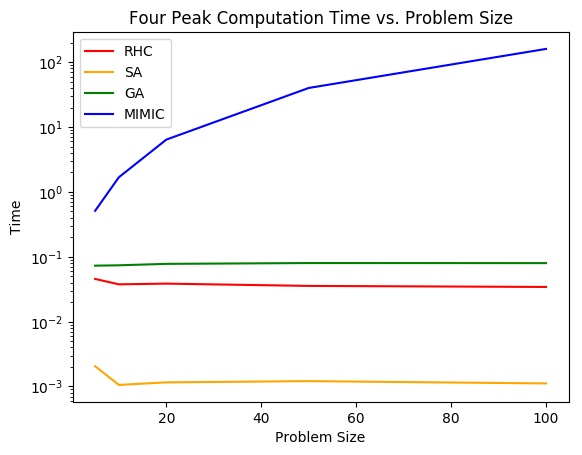

In [85]:

fig, ax = plt.subplots()
# set labels and title
ax.set_xlabel("Problem Size")
ax.set_ylabel("Time")

ax.set_title("Four Peak Computation Time vs. Problem Size")
plt.semilogy()

ax.plot(fp_problem_sizes, time_rhc_fp_size, label='RHC', color='red')
ax.plot(fp_problem_sizes, time_sa_fp_size, label='SA', color='orange')
ax.plot(fp_problem_sizes, time_ga_fp_size, label='GA', color='green')
ax.plot(fp_problem_sizes, time_mimic_fp_size, label='MIMIC', color='blue')

ax.legend()
# show plot
plt.show()

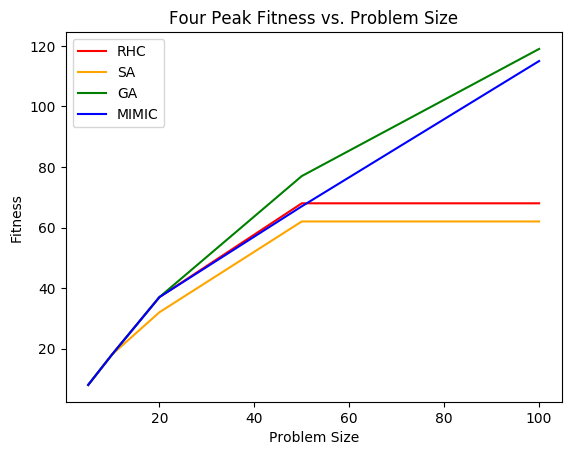

In [78]:
fig, ax = plt.subplots()
# set labels and title
ax.set_xlabel("Problem Size")
ax.set_ylabel("Fitness")

ax.set_title("Four Peak Fitness vs. Problem Size")

ax.plot(fp_problem_sizes, fitness_rhc_fp_size, label='RHC', color='red')
ax.plot(fp_problem_sizes, fitness_sa_fp_size, label='SA', color='orange')
ax.plot(fp_problem_sizes, fitness_ga_fp_size, label='GA', color='green')
ax.plot(fp_problem_sizes, fitness_mimic_fp_size, label='MIMIC', color='blue')

ax.legend()
# show plot
plt.show()